In [2]:
from flytracker.tracker import Tracker
from flytracker.utils import FourArenasQRCodeMask, SixteenArenasMask

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
%%time
mask = FourArenasQRCodeMask().mask
path = '../../data/movies/4arenas_QR.h264'
tracker = Tracker(mask=mask, movie_path=path, output_path='')
dataset = tracker.run(1000)

CPU times: user 1min 45s, sys: 18.5 s, total: 2min 3s
Wall time: 5.55 s


In [22]:
%%time
path = '../../data/movies/16arena_dots.h264'
mask = SixteenArenasMask().mask
tracker = Tracker(mask=mask, movie_path=path, output_path='')
#dataset = tracker.run(1000)

CPU times: user 315 µs, sys: 54 µs, total: 369 µs
Wall time: 316 µs


In [23]:
tracker.n_flies

In [24]:
dataset.initial_frame

AttributeError: 'DataFrame' object has no attribute 'initial_frame'

In [6]:
dataset

,frame,ID,x,y
0,99.0,0.0,414.632538,890.142456
1,99.0,1.0,474.138489,872.279175
2,99.0,2.0,458.735931,862.156555
3,99.0,3.0,924.312012,834.187256
4,99.0,4.0,330.235168,826.345032
...,...,...,...,...
40035,1099.0,35.0,558.104167,230.979167
40036,1099.0,36.0,295.021277,288.191489
40037,1099.0,37.0,795.275862,390.034483
40038,1099.0,38.0,320.340426,166.723404


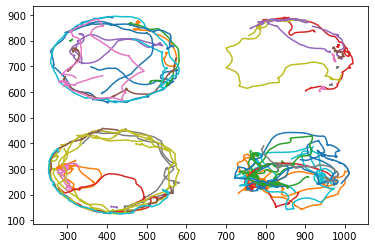

In [21]:
for fly in np.arange(tracker.n_flies):
    locs = dataset.query(f'ID == {fly}')
    plt.plot(locs.x, locs.y)
#plt.xlim([200, 600])
#plt.ylim([100, 500])

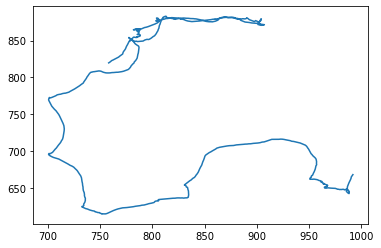

In [20]:
fly = 8.0
locs = dataset.query(f'ID == {fly}')
plt.plot(locs.x, locs.y)

#fly = 2.0
#locs = dataset.query(f'ID == {fly}')
#plt.plot(locs.x, locs.y)

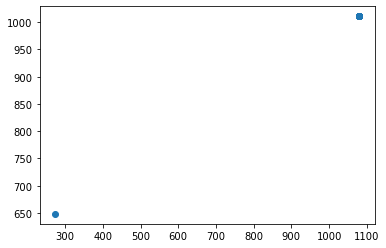

In [144]:
fly = 11
locs = dataset.query(f'ID == {fly}')
plt.scatter(locs.x, locs.y)

In [146]:
locs

,frame,ID,x,y
11,99.0,11.0,272.751831,648.351379
80,100.0,11.0,1079.906574,1010.771626
149,101.0,11.0,1079.906574,1010.771626
218,102.0,11.0,1079.906574,1010.771626
287,103.0,11.0,1079.906574,1010.771626
...,...,...,...,...
68735,1095.0,11.0,1079.881533,1010.811847
68804,1096.0,11.0,1079.909722,1010.805556
68873,1097.0,11.0,1079.909722,1010.805556
68942,1098.0,11.0,1079.909722,1010.805556


In [25]:
cap = cv.VideoCapture('../../data/movies/16arena_dots.h264') #video_name is the video being called
for _ in np.arange(1100):
    _ = cap.read() # Read the frame

In [29]:
mask = SixteenArenasMask().mask

In [30]:
ret, image = cap.read() # Read the frame

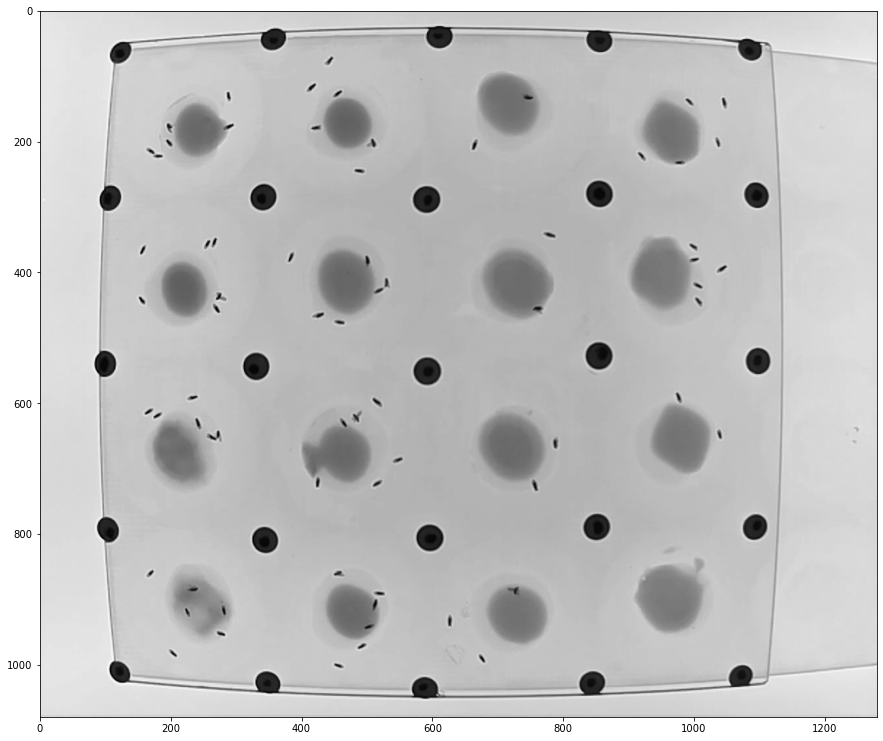

In [56]:
ret, image = cap.read() # Read the frame
image = cv.cvtColor(cap.read()[1], cv.COLOR_BGR2GRAY)
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')

In [35]:
blob_detector = cv.SimpleBlobDetector_create(default_blob_detector_params())

In [37]:
image = cv.cvtColor(cap.read()[1], cv.COLOR_BGR2GRAY)
keypoints = blob_detector.detect(image * mask)  # get keypoints

In [38]:
def default_blob_detector_params():
    # Setup SimpleBlobDetector parameters.
    params = cv.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 20
    params.maxThreshold = 150

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 15
    params.maxArea = 60
    params.minDistBetweenBlobs = 1.0

    # Turn off other filters
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False

    return params

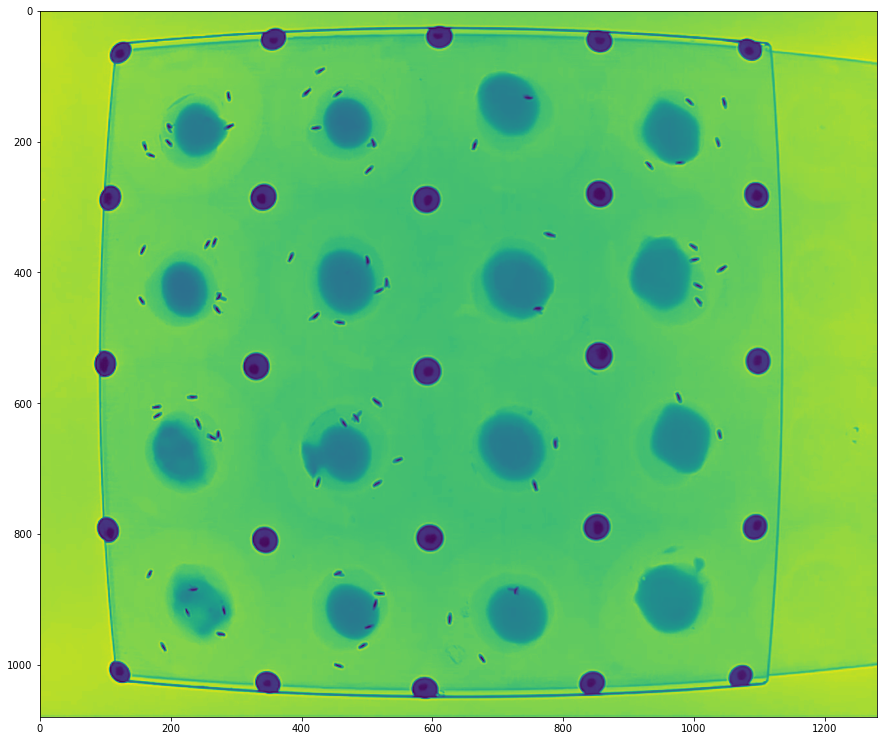

In [42]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

[<KeyPoint 0x7fa9ea5c3120>,
 <KeyPoint 0x7fa9ea5c30c0>,
 <KeyPoint 0x7fa9ea5c36c0>,
 <KeyPoint 0x7fa9ea5c3630>,
 <KeyPoint 0x7fa9ea5c3900>,
 <KeyPoint 0x7fa9ea5c34e0>,
 <KeyPoint 0x7fa9ea5c3450>,
 <KeyPoint 0x7fa9ea5c36f0>,
 <KeyPoint 0x7fa9ea5c3ba0>,
 <KeyPoint 0x7fa9ea5c3780>,
 <KeyPoint 0x7fa9ea5c39f0>,
 <KeyPoint 0x7fa9ea5c37b0>,
 <KeyPoint 0x7fa9ea5c3420>,
 <KeyPoint 0x7fa9ea5c3b70>,
 <KeyPoint 0x7fa9ea5c3870>,
 <KeyPoint 0x7fa9ea5c38a0>,
 <KeyPoint 0x7fa9ea5c35a0>,
 <KeyPoint 0x7fa9ea5c3720>,
 <KeyPoint 0x7fa9ea5c3a20>,
 <KeyPoint 0x7fa9ea5c3b10>,
 <KeyPoint 0x7fa9ea5c37e0>,
 <KeyPoint 0x7fa9ea5c3960>,
 <KeyPoint 0x7fa9ea5c3750>,
 <KeyPoint 0x7fa9ea5c3e70>,
 <KeyPoint 0x7fa9ea5c3090>,
 <KeyPoint 0x7fa9ea5c3a80>,
 <KeyPoint 0x7fa9ea5c3690>,
 <KeyPoint 0x7fa9ea5c3bd0>,
 <KeyPoint 0x7fa9ea5c3c00>,
 <KeyPoint 0x7fa9ea5c3a50>,
 <KeyPoint 0x7fa9ea5c3de0>,
 <KeyPoint 0x7fa9ea5c3ab0>,
 <KeyPoint 0x7fa9ea5c32d0>,
 <KeyPoint 0x7fa9ea5c3cc0>,
 <KeyPoint 0x7fa9ea5c3840>,
 <KeyPoint 0x7fa9ea5

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

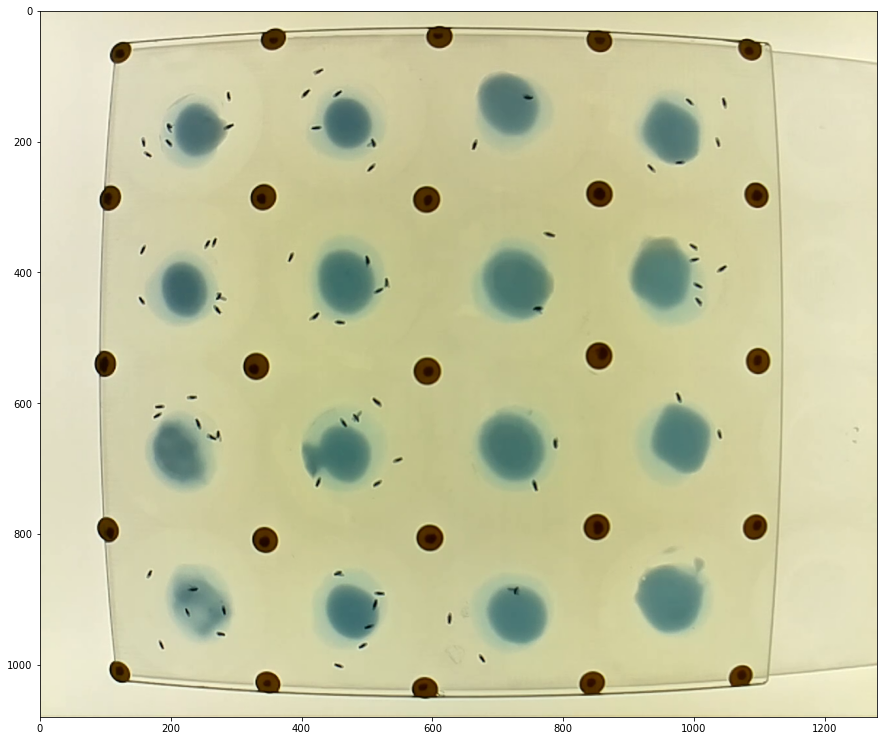

In [27]:
 ret, image = cap.read() # Read the frame
plt.figure(figsize=(15, 15))
plt.imshow(image)
for fly in np.arange(tracker.n_flies):
    locs = dataset.query(f'ID == {fly} and frame==1099')
    plt.scatter(locs.x, locs.y)

In [101]:
mask

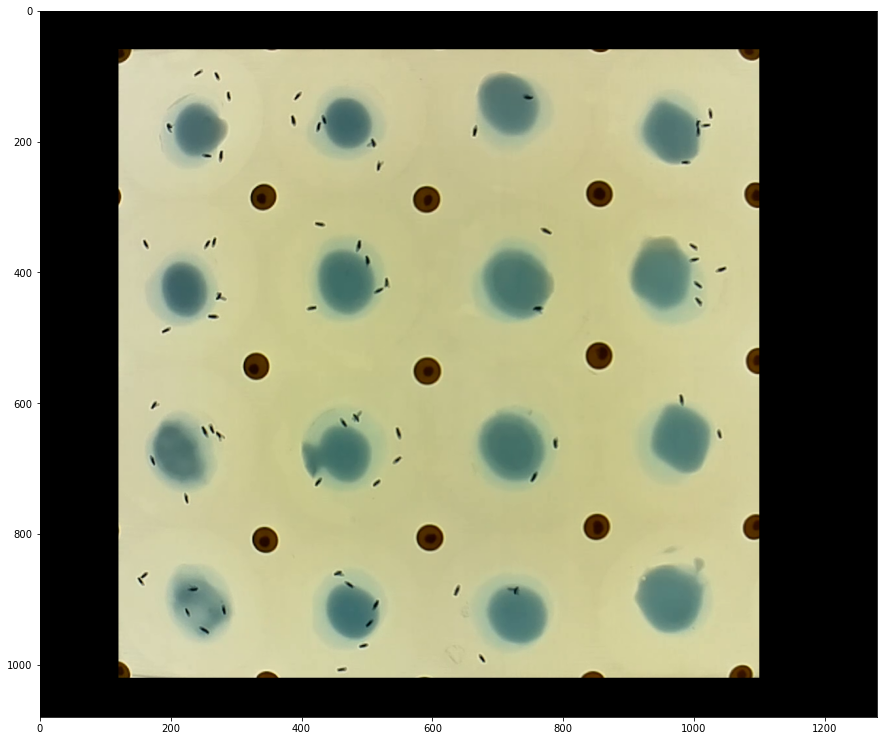

In [129]:


plt.figure(figsize=(15, 15))
plt.imshow(image * mask[:, :,  None])

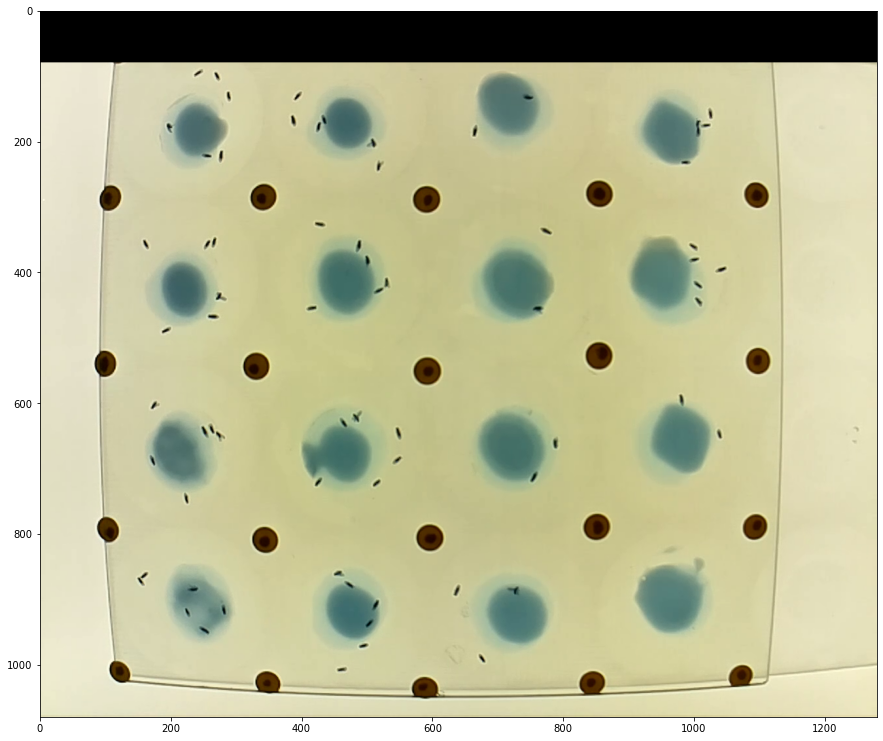